In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, BatchNormalization
from tensorflow.keras.layers import Input, concatenate, UpSampling2D, Activation
from tensorflow.keras.applications import VGG16, vgg16, ResNet50
import tensorflow.keras.backend as kb

import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import cv2
import scipy.io
from skimage import color

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skimage.transform import resize

In [67]:
def res_cnn(img_shape):

    res = ResNet50(include_top=False, weights='imagenet', input_shape=img_shape)
    sliced_loaded_model = Sequential(res.layers[:13])
    new_input = sliced_loaded_model.input

    x = sliced_loaded_model.output

    x = Conv2D(128, (3, 3), padding='same', name='conv2d_11')(x)
    x = BatchNormalization(name='batchnorm_11')(x)
    x = Activation(tf.keras.activations.relu)(x)
    x = UpSampling2D(size=(2,2))(x)

    x = Conv2D(128, (3, 3), padding='same', name='conv2d_22')(x)
    x = BatchNormalization(name='batchnorm_22')(x)
    x = Activation(tf.keras.activations.relu)(x)
    x = UpSampling2D(size=(2,2))(x)

    x = Conv2D(64, (3, 3), padding='same', name='conv2d_33')(x)
    x = BatchNormalization(name='batchnorm_33')(x)
    x = Activation(tf.keras.activations.relu)(x)

    x = Conv2D(64, (3, 3), padding='same', name='conv2d_44')(x)
    x = BatchNormalization(name='batchnorm_44')(x)
    x = Activation(tf.keras.activations.relu)(x)

    x = Conv2D(32, (3, 3), padding='same', name='conv2d_55')(x)
    x = BatchNormalization(name='batchnorm_55')(x)
    x = Activation(tf.keras.activations.relu)(x)

    x = Conv2D(32, (3, 3), padding='same', name='conv2d_66')(x)
    x = BatchNormalization(name='batchnorm_66')(x)
    x = Activation(tf.keras.activations.relu)(x)

    x = Conv2D(2, (3, 3), padding='same', name='conv2d_77')(x)
    x = BatchNormalization(name='batchnorm_77')(x)
    x = Activation(tf.keras.activations.relu)(x)

    new_output = kb.concatenate((kb.expand_dims(new_input[:,:,:,0]), x), axis=-1)

    new_model = Model(
      inputs=(new_input),
      outputs=new_output,
      name="modified resnet")
    return new_model

In [68]:
model = res_cnn((32,32,3))
print(model.summary())

Model: "modified resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_32[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[1][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[1][0]                 
____________________________________________________________________________________

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-image==0.17.2

     |████████████████████████████████| 12.4MB 312kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


In [ ]:
import skimage

print(skimage.__version__)

0.16.2


In [ ]:
# Connect to TPU

%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.81.41.218:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.81.41.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.81.41.218:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
def create_vgg_model(img_shape):
    """ 
    img_shape: {tuple} shape of one image (height, width, num_channels)
    output: {model} a tensorflow model

    summary: builds CNN with VGG imagenet weights and 3 FC layers
    """
    model = VGG16(include_top=False, weights='imagenet', input_shape=img_shape)
    # make the first few layers unlearnable
    # for i, layer in enumerate(model.layers):
    #   layer.trainable = False
    #   print(layer.name)
    #   if i == 14:
    #     break

    output = model.output

    x = Flatten(name='flatten')(output)

    x = Dense((img_shape[0] * img_shape[0] * 2))(x)

    batch_size = kb.shape(model.input)[0]

    output = kb.reshape(x, (batch_size, img_shape[0], img_shape[0], 2))
    input = tf.keras.backend.expand_dims(model.input[:,:,:,0],axis=-1)
    output = kb.concatenate((input, output), axis=-1)


    model = Model(
      inputs=(model.input),
      outputs=output,
      name="vgg")

    return model
  

In [ ]:
model = create_vgg_model((64,64,3))

print(model.summary())

In [ ]:
# Load in the data
DATA_PATH = '/content/drive/MyDrive/Junior Year/COS 429 - Team Project/Data'

# training images and labels
lab_train = np.load(os.path.join(DATA_PATH,'lab_train_images.npy'))

X_train = np.expand_dims(lab_train[:, :, :, 0], axis=3)
y_train = lab_train

# testing images and labels
lab_test = np.load(os.path.join(DATA_PATH,'lab_test_images.npy'))

X_test = np.expand_dims(lab_test[:, :, :, 0], axis=3)
y_test = lab_test

# X_train_small = X_train[:10]
# y_train_small = y_train[:10]

# X_test_small = X_test[:10]
# y_test_small = y_test[:10]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(11924, 64, 64, 1)
(11924, 64, 64, 3)
(2982, 64, 64, 1)
(2982, 64, 64, 3)


In [ ]:
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = tf.keras.datasets.cifar10.load_data()

In [ ]:
lab_train = color.rgb2lab(X_train_orig / 255)
lab_test = color.rgb2lab(X_test_orig / 255)

In [ ]:
X_train = np.expand_dims(lab_train[:, :, :, 0], axis=3)
X_test = np.expand_dims(lab_test[:, :, :, 0], axis=3)

y_train = lab_train
y_test = lab_test

X_train = X_train[:10]
X_test = X_test[:10]

y_train = y_train[:10]
y_test = y_test[:10]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(10, 32, 32, 1)
(10, 32, 32, 3)
(10, 32, 32, 1)
(10, 32, 32, 3)


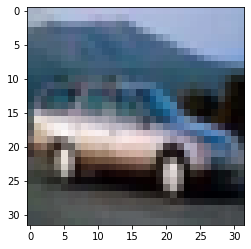

In [ ]:
im = color.lab2rgb(y_train[4])

plt.imshow(im)

In [ ]:
def l2_loss(y_true, y_pred):
    """
    y_pred is the ab channels
    y_true is the rgb true image

    summary: converts y_pred to rgb and takes L2 loss
    """
    # # convert them both to numpy
    # y_true = y_true.numpy()
    # y_pred = y_pred.numpy()

    # # put the y_pred between 0 and 255 and get rgb version
    # y_pred = np.interp(y_pred, (y_pred.min(), y_pred.max()), (0, 255))
    # y_pred = color.lab2rgb(y_pred)

    # plt.imshow(y_pred[0])
    # plt.show()
    # plt.imshow(y_true[0])
    # plt.show()

    # # flatten them back to be tensors
    # # y_true = Flatten(name='flatten')(y_true)
    # y_true = tf.cast(y_true, tf.float32)

    # # y_pred = Flatten(name='flatten')(y_pred)
    # y_pred = tf.cast(y_pred, tf.float32)

    # print(y_true)
    # print(y_pred)

    squared_difference = tf.square(y_true - y_pred)

    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

In [ ]:
def cnn_model(img_shape):
    """ 
    img_shape: {tuple} shape of one image (height, width, num_channels)
    output: {model} a tensorflow model
    """

    input = Input(shape=img_shape, name='input')

    x = Conv2D(16, (3, 3), strides=(2,2), input_shape=img_shape, activation='relu', name='conv2d_1')(input)
    x = Conv2D(16, (3, 3), input_shape=img_shape, activation='relu', name='conv2d_11')(x)
    x = BatchNormalization(name='batchnorm_1')(x)

    x = Conv2D(32, (3, 3), activation='relu', name='conv2d_2')(x)
    x = Conv2D(32, (3, 3), input_shape=img_shape, activation='relu', name='conv2d_22')(x)
    x = BatchNormalization(name='batchnorm_2')(x)

    x = Conv2D(64, (3, 3), activation='relu', name='conv2d_3')(x)
    x = Conv2D(64, (3, 3), input_shape=img_shape, activation='relu', name='conv2d_33')(x)
    x = BatchNormalization(name='batchnorm_3')(x)

    x = Conv2D(128, (3, 3), activation='relu', name='conv2d_4')(x)
    x = Conv2D(128, (3, 3), input_shape=img_shape, activation='relu', name='conv2d_44')(x)
    x = BatchNormalization(name='batchnorm_4')(x)

    # x = Conv2D(256, (3, 3), activation='relu', name='conv2d_5', padding='same')(x)
    # x = Conv2D(256, (3, 3), input_shape=img_shape, activation='relu', name='conv2d_55', padding='same')(x)
    # x = BatchNormalization(name='batchnorm_5')(x)

    # x = Conv2D(128, (3, 3), activation='relu', name='conv2d_4')(x)
    # x = BatchNormalization(name='batchnorm_4')(x)

    # x = Conv2D(64, (3, 3), activation='relu', name='conv2d_5')(x)
    # x = BatchNormalization(name='batchnorm_5')(x)

    x = Flatten(name='flatten')(x)

    x = Dense((img_shape[0] * img_shape[0] * 2), 
      kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-3),
      bias_regularizer=tf.keras.regularizers.l2(1e-3),
      activity_regularizer=tf.keras.regularizers.l2(1e-4))(x)

    batch_size = kb.shape(input)[0]

    output = kb.reshape(x, (batch_size, img_shape[0], img_shape[0], 2))
    output = kb.concatenate((input, output), axis=-1)

    model = Model(
      inputs=(input),
      outputs=output,
      name="cnn_model")
    
    return model

In [ ]:
def naive_model(img_shape):
    """ 
    img_shape: {tuple} shape of one image (height, width, num_channels)
    output: {model} a tensorflow model
    """

    input = Input(shape=img_shape, name='input')

    x = Conv2D(32, (5, 5,), strides=(2,2), input_shape=img_shape, activation='relu', name='conv2d_1')(input)
    x = BatchNormalization(name='batchnorm_1')(x)

    x = Conv2D(64, (5, 5), activation='relu', name='conv2d_2')(x)
    x = BatchNormalization(name='batchnorm_2')(x)

    x = Conv2D(128, (5, 5), activation='relu', name='conv2d_3')(x)
    x = BatchNormalization(name='batchnorm_3')(x)

    x = Conv2D(256, (5, 5), activation='relu', name='conv2d_4')(x)
    x = BatchNormalization(name='batchnorm_4')(x)

    x = Flatten(name='flatten')(x)

    x = Dense((img_shape[0] * img_shape[0] * 2))(x)

    batch_size = kb.shape(input)[0]

    output = kb.reshape(x, (batch_size, img_shape[0], img_shape[0], 2))
    output = kb.concatenate((input, output), axis=-1)

    model = Model(
      inputs=(input),
      outputs=output,
      name="naive_model")
  
    
    return model

In [ ]:
model = naive_model((32, 32, 1))
print(model.summary())

Model: "naive_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 32)   832         input[0][0]                      
__________________________________________________________________________________________________
batchnorm_1 (BatchNormalization (None, 14, 14, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 10, 10, 64)   51264       batchnorm_1[0][0]                
________________________________________________________________________________________

In [ ]:
def deep_model(img_shape):
    """ 
    img_shape: {tuple} shape of one image (height, width, num_channels)
    output: {model} a tensorflow model
    """

    input = Input(shape=img_shape, name='input')

    x = Conv2D(32, (1, 1), padding='same', input_shape=img_shape, activation='relu', name='conv2d_1')(input)
    x = BatchNormalization(name='batchnorm_1')(x)

    x = Conv2D(32, (1, 1), padding='same',activation='relu', name='conv2d_2')(x)
    x = BatchNormalization(name='batchnorm_2')(x)

    x = Conv2D(64, (1, 1), padding='same',activation='relu', name='conv2d_3')(x)
    x = BatchNormalization(name='batchnorm_3')(x)

    x = Conv2D(64, (1, 1), padding='same',activation='relu', name='conv2d_4')(x)
    x = BatchNormalization(name='batchnorm_4')(x)

    x = Conv2D(128, (1, 1), padding='same',activation='relu', name='conv2d_5')(x)
    x = BatchNormalization(name='batchnorm_5')(x)

    x = Conv2D(128, (1, 1), padding='same',activation='relu', name='conv2d_6')(x)
    x = BatchNormalization(name='batchnorm_6')(x)

    x = Conv2D(256, (1, 1), padding='same',activation='relu', name='conv2d_7')(x)
    x = BatchNormalization(name='batchnorm_7')(x)

    x = Conv2D(256, (1, 1), padding='same',activation='relu', name='conv2d_8')(x)
    x = BatchNormalization(name='batchnorm_8')(x)

    x = Conv2D(128, (1, 1), padding='same', activation='relu', name='conv2d_9')(x)
    x = BatchNormalization(name='batchnorm_9')(x)

    x = Conv2D(128, (1, 1), padding='same', activation='relu', name='conv2d_10')(x)
    x = BatchNormalization(name='batchnorm_10')(x)

    x = Conv2D(128, (1, 1), padding='same', activation='relu', name='conv2d_11')(x)
    x = BatchNormalization(name='batchnorm_11')(x)

    x = Conv2D(64, (1, 1), padding='same', activation='relu', name='conv2d_12')(x)
    x = BatchNormalization(name='batchnorm_12')(x)

    x = Conv2D(64, (1, 1), padding='same', activation='relu', name='conv2d_13')(x)
    x = BatchNormalization(name='batchnorm_13')(x)

    x = Conv2D(32, (1, 1), padding='same', activation='relu', name='conv2d_14')(x)
    x = BatchNormalization(name='batchnorm_14')(x)

    x = Conv2D(2, (1, 1), padding='same', name='conv2d_15')(x)
    x = BatchNormalization(name='batchnorm_15')(x)

    batch_size = kb.shape(input)[0]

    output = kb.reshape(x, (batch_size, img_shape[0], img_shape[0], 2))
    output = kb.concatenate((input, output), axis=-1)

    model = Model(
      inputs=(input),
      outputs=output,
      name="naive_model")
  
    
    return model

In [ ]:
model = deep_model((32,32,1))
print(model.summary())

Model: "naive_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   320         input[0][0]                      
__________________________________________________________________________________________________
batchnorm_1 (BatchNormalization (None, 32, 32, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   9248        batchnorm_1[0][0]                
________________________________________________________________________________________

In [ ]:
def resnet_cnn(img_shape):
  
  

In [ ]:
def __display_training_curves(training, validation, subplot):
    """
    summary: helper function for plotting the model history
    """
    ax = plt.subplot(subplot)
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('training loss vs validation loss')
    ax.set_ylabel('loss')
    ax.set_xlabel('epochs')
    ax.legend(['training', 'validation'])

def model_history(history, size=10):
    """
    history: {history} tensorflow history object
    size: {size} size of viewing window

    summary: plots the model history (training vs. validation loss)
    """
    plt.subplots(figsize=(size, size))
    plt.tight_layout()
    __display_training_curves(history.history['loss'], history.history['val_loss'], 211)
  
def evaluate_model(model, X_input, y_input, size=None):
    """
    summary: prints important performance indicators of the model and returns them.
            Also, if a figure size is specified, it plots the predicted vs actual
            values for the given inputs.

    input: takes in the model and X and y inputs to evaluate the model on.
    output: r2, mae, mse, mape
    """
    results = model.evaluate(X_input, y_input, verbose=0)

    y_pred = model.predict(X_input)

    r2 = r2_score(y_input, y_pred)
    mae = mean_absolute_error(y_input, y_pred)
    mse = mean_squared_error(y_input, y_pred)
    mape = results[2]

    if (size != None):
      plt.subplots(figsize=(size, size))
      visualize.__display_predictions(y_pred, y_input, 211)

    print(f"r^2: {r2}")
    print(f"mse: {mse}")
    print(f"mae: {mae}")
    print(f"mape: {mape}")

    return y_pred

In [ ]:
# with tpu_strategy.scope():
PATH = '/content/drive/MyDrive/Junior Year/COS 429 - Team Project/Models'
MODEL_TYPE = 'deep'

model = deep_model((32,32,1))

# stop training once validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)


# save the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(PATH, f"{MODEL_TYPE}.h5"),
                                                overwrite=True, save_weights_only=False, 
                                                monitor='val_loss', mode='min', save_best_only=True)

callbacks = [early, checkpoint]


model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3), loss=l2_loss)


history = model.fit(X_train, y_train,
            epochs=400, verbose=2,
            validation_split=0.2, shuffle=True, callbacks=[callbacks])

Epoch 1/400
1/1 - 0s - loss: 274.3940 - val_loss: 120.9317
Epoch 2/400
1/1 - 0s - loss: 265.8093 - val_loss: 119.8122
Epoch 3/400
1/1 - 0s - loss: 261.1094 - val_loss: 119.2206
Epoch 4/400
1/1 - 0s - loss: 258.1707 - val_loss: 119.1223
Epoch 5/400
1/1 - 0s - loss: 256.1320 - val_loss: 119.2380
Epoch 6/400
1/1 - 0s - loss: 254.7065 - val_loss: 119.1492
Epoch 7/400
1/1 - 0s - loss: 253.7289 - val_loss: 119.4066
Epoch 8/400
1/1 - 0s - loss: 252.7427 - val_loss: 119.6149
Epoch 9/400


KeyboardInterrupt: ignored

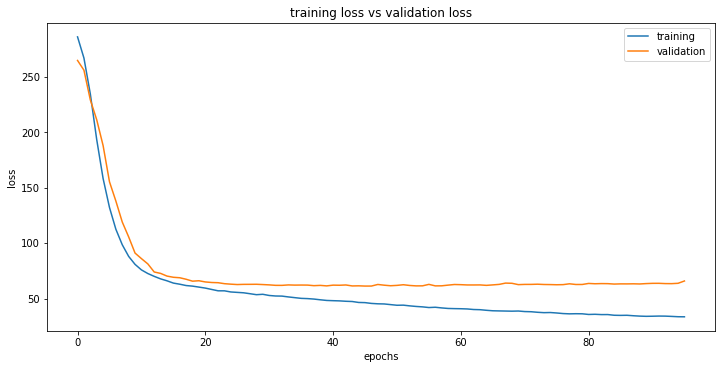

In [ ]:
model_history(history, 10)

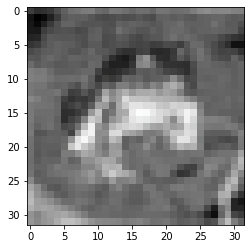

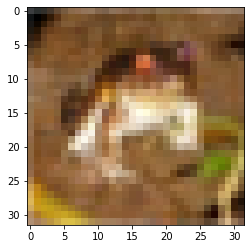

In [ ]:
PATH = '/content/drive/MyDrive/Junior Year/COS 429 - Team Project/Models'
MODEL_TYPE = 'naive_32'

# model = tf.keras.models.load_model(os.path.join(PATH, f"{MODEL_TYPE}.h5"), custom_objects={'l2_loss':l2_loss})

# print(model.summary())

y_pred = model.predict(X_train[:10])

i = 0

im_pred = y_pred[i].reshape(32, 32, 3)
im_pred = color.lab2rgb(im_pred)
plt.imshow(im_pred, vmin=0, vmax=1)
plt.show()

im_orig = y_train[i]
im_orig = color.lab2rgb(im_orig)
plt.imshow(im_orig, vmin=0, vmax=1)
plt.show()

In [ ]:
model = cnn_model((64,64,1))
print(model.summary())

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 4)         104       
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 60, 60, 4)         16        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 8)         808       
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 56, 56, 8)         32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 16)        3216      
_________________________________________________________________
batchnorm_3 (BatchNormalizat (None, 52, 52, 16)        64

In [ ]:
def vgg(img_shape):
    """ 
    img_shape: {tuple} shape of one image (height, width, num_channels)
    output: {model} a tensorflow model

    summary: builds CNN with VGG imagenet weights and 3 FC layers
    """

    # CNN weights are still learnable
    model = VGG16(include_top=False, weights='imagenet', input_shape=img_shape)

    # define new model
    return model

In [ ]:
model = vgg((64, 64,1))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     